## 3D Bubble charts with plotly and MULTI__ Profile Data!
Using the plotly's 3d bubble plots we can display 5 dimensions of data. Those can be node, context,thread with time and timer, or 3 mutli timers with the node and timer, etc. Gets to be a lot of options. 

We first import the data as normal, then flatten out the indexes. It will be easier to plot the threads if they are not longer part of the multi-index.

In [1]:
from tau_profile_parser import TauProfileParser
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

In [2]:
multi_files = TauProfileParser.parse('/home/users/MTrappett/lulesh_summit_profiles')
multi_files_df = multi_files.interval_data()

## Plotly Example
Using as a template, this example from plotly: https://plotly.com/python/3d-bubble-charts/ . 

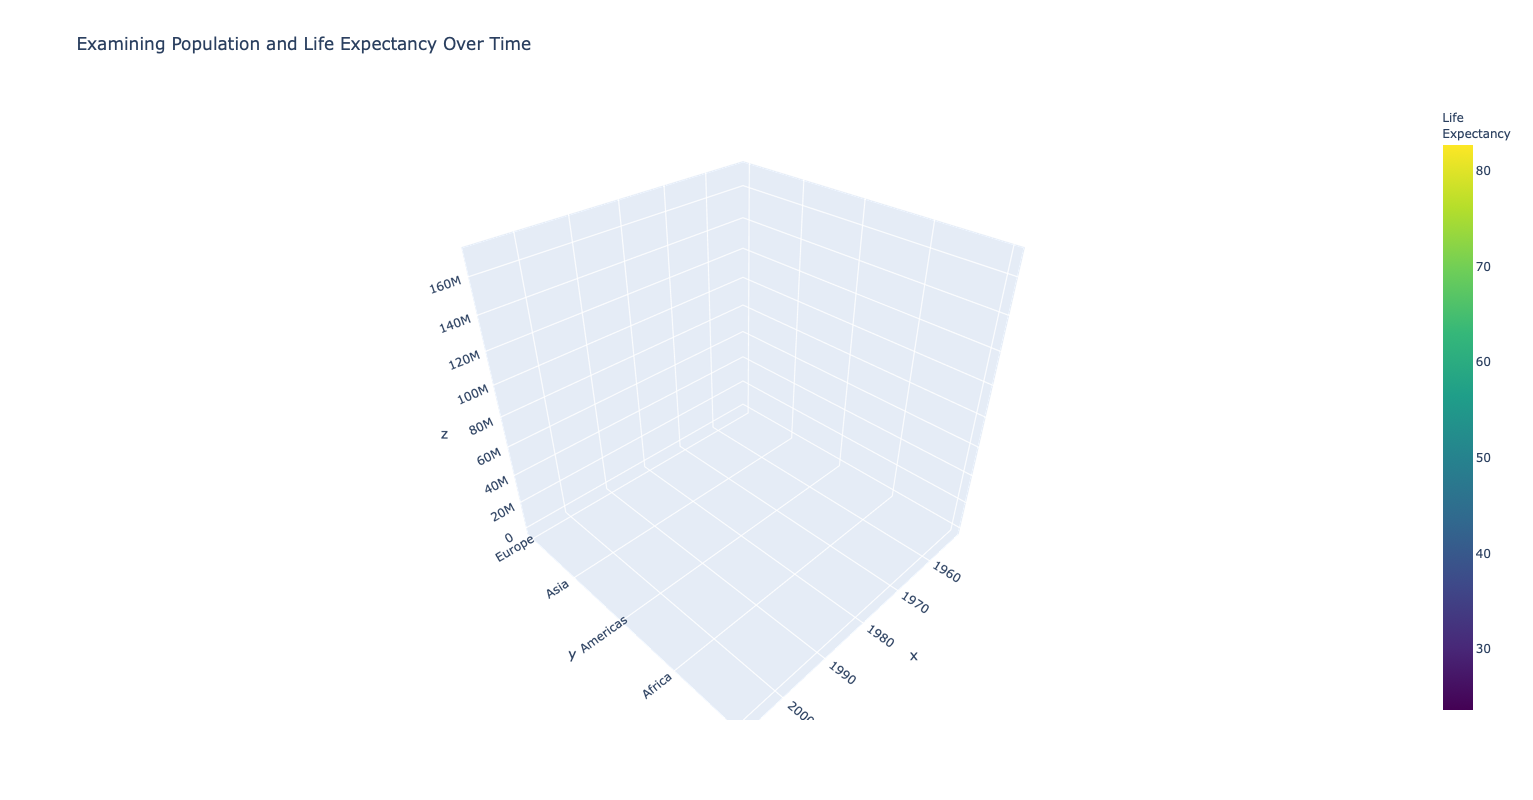

In [11]:
# Get Data: this ex will only use part of it (i.e. rows 750-1500)
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')

start, end = 750, 1500

fig = go.Figure(data=go.Scatter3d(
    x=df['year'][start:end],
    y=df['continent'][start:end],
    z=df['pop'][start:end],
    text=df['country'][start:end],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=750,
        size=df['gdpPercap'][start:end],
        color = df['lifeExp'][start:end],
        colorscale = 'Viridis',
        colorbar_title = 'Life<br>Expectancy',
        line_color='rgb(140, 140, 170)'
    )
))


fig.update_layout(height=800, width=800,
                  title='Examining Population and Life Expectancy Over Time')

fig.show()

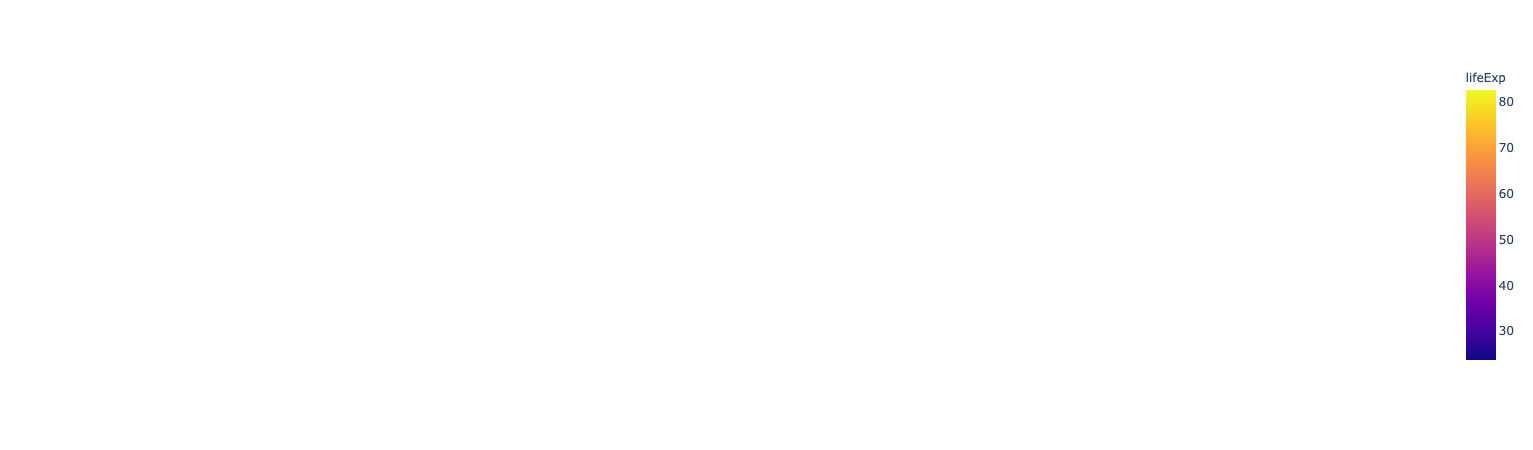

In [12]:
import plotly.express as px
import numpy as np
df = px.data.gapminder()
fig = px.scatter_3d(df, x='year', y='continent', z='pop', size='gdpPercap', color='lifeExp',
                    hover_data=['country'])
fig.update_layout(scene_zaxis_type="log")
fig.show()

In [4]:
multi_files_df = multi_files_df.reset_index()
multi_files.metadata

{'Metric Name': 'TIME',
 'CPU MHz': '3450.000000MHz',
 'CPU Type': 'POWER9, altivec supported',
 'CWD': '/gpfs/alpine/gen010/scratch/khuck/khuck/lulesh',
 'Command Line': '/ccs/home/khuck/src/LULESH/lulesh2.0 -i 100 -p',
 'Ending Timestamp': '1597861842556323',
 'Executable': '/autofs/nccs-svm1_home1/khuck/src/LULESH/lulesh2.0',
 'Hostname': 'g24n02',
 'Local Time': '2020-08-19T14:30:13-04:00',
 'MPI Processor Name': 'g24n02',
 'Memory Size': '634191808 kB',
 'Node Name': 'g24n02',
 'OMP_CHUNK_SIZE': '0',
 'OMP_DEFAULT_DEVICE': '0',
 'OMP_DYNAMIC': 'FALSE',
 'OMP_MAX_ACTIVE_LEVELS': '2',
 'OMP_MAX_TASK_PRIORITY': '0',
 'OMP_MAX_THREADS': '7',
 'OMP_NUM_PLACES': '1',
 'OMP_NUM_PROCS': '1',
 'OMP_PLACES': 'threads',
 'OMP_PLACE_NUM_PROCS': '{0:1}',
 'OMP_PLACE_PROC_IDS': '{0:[0]}',
 'OMP_PROC_BIND': 'TRUE',
 'OMP_SCHEDULE': 'STATIC',
 'OMP_THREAD_LIMIT': '2147483647',
 'OS Machine': 'ppc64le',
 'OS Name': 'Linux',
 'OS Release': '4.14.0-115.21.2.el7a.ppc64le',
 'OS Version': '#1 SMP Thu 

In [5]:
multi_files_df.head(20)

,Node,Context,Thread,Timer,Calls,Subcalls,Exclusive,Inclusive,ProfileCalls,Group,Timer Name,Timer Location,Timer Type
0,0,0,0,.TAU application,1,54931,193222,29301435,0,"GROUP=""TAU_DEFAULT""",.TAU application,None,None
1,0,0,0,MPI_Init_thread(),1,0,389967,389967,0,"GROUP=""MPI""",MPI_Init_thread(),None,None
2,0,0,0,MPI_Comm_size(),1,0,1,1,0,"GROUP=""MPI""",MPI_Comm_size(),None,None
3,0,0,0,MPI_Comm_rank(),905,0,338,338,0,"GROUP=""MPI""",MPI_Comm_rank(),None,None
4,0,0,0,MPI_Irecv(),1707,0,1385,1385,0,"GROUP=""MPI""",MPI_Irecv(),None,None
5,0,0,0,MPI_Isend(),1007,0,2473,2473,0,"GROUP=""MPI""",MPI_Isend(),None,None
6,0,0,0,MPI_Waitall(),301,0,1497,1497,0,"GROUP=""MPI""",MPI_Waitall(),None,None
7,0,0,0,MPI_Wait(),1707,0,15325235,15325235,0,"GROUP=""MPI""",MPI_Wait(),None,None
8,0,0,0,MPI_Barrier(),1,0,93,93,0,"GROUP=""MPI""",MPI_Barrier(),None,None
9,0,0,0,OpenMP_Parallel_Region CalcForceForNodes [{/cc...,102,102,470,207671,0,"GROUP=""TAU_OPENMP""",OpenMP_Parallel_Region CalcForceForNodes,"{/ccs/home/khuck/src/LULESH/lulesh.cc} {1114, 0}",None


In [6]:
multi_files_df = pd.concat([multi_files_df,multi_files_df[multi_files_df['Timer Name'].str.match('OpenMP_Implicit_Task')],multi_files_df[multi_files_df['Timer Name'].str.match('OpenMP_Implicit_Task')]]).drop_duplicates(keep=False)

In [7]:
multi_files_df = pd.concat([multi_files_df,multi_files_df[multi_files_df['Timer Name'].str.match('.TAU application')],multi_files_df[multi_files_df['Timer Name'].str.match('.TAU application')]]).drop_duplicates(keep=False)

In [8]:
multi_files_df = pd.concat([multi_files_df,multi_files_df[multi_files_df['Timer Name'].str.match('OpenMP_Thread_Type_ompt_thread_worker')],multi_files_df[multi_files_df['Timer Name'].str.match('OpenMP_Thread_Type_ompt_thread_worker')]]).drop_duplicates(keep=False)

In [9]:
fig = go.Figure(data=go.Scatter3d(
    x=multi_files_df[('Exclusive','PAPI_TOT_INS')],
    y=multi_files_df['Timer Name'],
    z=multi_files_df[('Exclusive','TIME')],
    text=multi_files_df['Timer'],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=300,
        size=multi_files_df['Calls'],
        color=multi_files_df['Thread'],
        colorbar_title = 'Number<br>of<br>Threads',
        colorscale = 'Hot',
        line_color='rgb(140, 140, 170)')
    ))

fig.update_layout(width=1000, height=1000, title = 'Investigation of PAPI metrics and 3D plotly scatter plot',
                  scene = dict(xaxis=dict(title='Exclusive, PAPI_TOT_INS'),
                               yaxis=dict(title='Timer Name'),
                               zaxis=dict(title='Exclusive, TIME'),
                               
                           ))
fig.show()

KeyError: ('Exclusive', 'PAPI_TOT_INS')